# Setup

In [1]:
import pandas as pd
from scipy import stats

In [2]:
import seaborn as sns

# Laod Data

In [3]:
filename = './output02.csv'
df = pd.read_csv(filename, index_col=0)
df.head()

,wc_self,wc_target,wc_intercept,Overlap_score,IOS_score,IOS_group
MID,,,,,,
2,2,0,0,0.000000,5,HighIOS
3,14,10,1,0.043478,2,LowIOS
5,2,0,0,0.000000,2,LowIOS
8,0,2,0,0.000000,7,HighIOS
9,4,0,0,0.000000,1,LowIOS


In [4]:
df.groupby('IOS_group').size()

IOS_group
HighIOS    41
LowIOS     39
Neither     8
dtype: int64

In [5]:
df = df.dropna()
df.head()

,wc_self,wc_target,wc_intercept,Overlap_score,IOS_score,IOS_group
MID,,,,,,
2,2,0,0,0.000000,5,HighIOS
3,14,10,1,0.043478,2,LowIOS
5,2,0,0,0.000000,2,LowIOS
8,0,2,0,0.000000,7,HighIOS
9,4,0,0,0.000000,1,LowIOS


In [6]:
df.groupby('IOS_group').size()

IOS_group
HighIOS    37
LowIOS     39
Neither     8
dtype: int64

# Descriptive Statistics on Overlap Score

In [7]:
# Low IOS Group
df.loc[df['IOS_group'] == 'LowIOS', ['Overlap_score']].describe().T

,count,mean,std,min,25%,50%,75%,max
Overlap_score,39.0,0.070342,0.082358,0.0,0.0,0.047619,0.121324,0.375


In [8]:
# High IOS Group
df.loc[df['IOS_group'] == 'HighIOS', ['Overlap_score']].describe().T

,count,mean,std,min,25%,50%,75%,max
Overlap_score,37.0,0.051553,0.081492,0.0,0.0,0.0,0.090909,0.285714


# Visualization

## Overlapping Score: Histogram

array([[<Axes: title={'center': 'HighIOS'}>,
        <Axes: title={'center': 'LowIOS'}>],
       [<Axes: title={'center': 'Neither'}>, <Axes: >]], dtype=object)

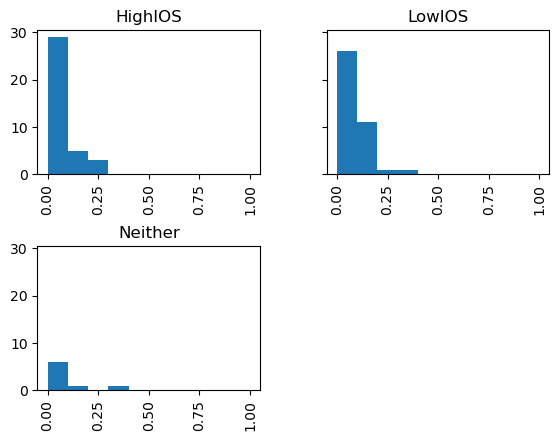

In [9]:
df['Overlap_score'].hist(by=df['IOS_group'], range=[0, 1], sharey=True)

## Overlapping Score: Boxplot

<Axes: title={'center': 'Overlap_score'}, xlabel='[IOS_group]'>

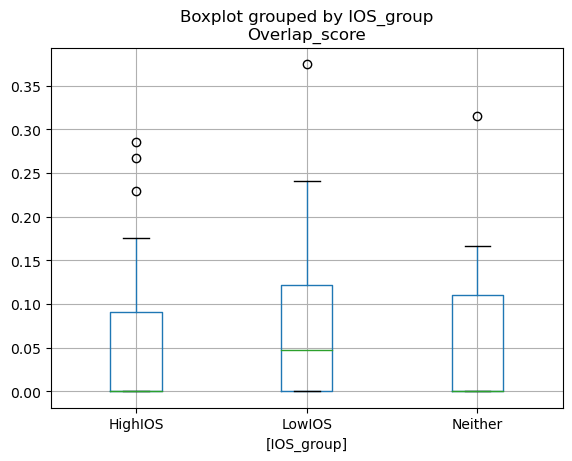

In [10]:
df.boxplot(column=['Overlap_score'], by=['IOS_group'])

## Overlapping Score: Scatter plot

<Axes: xlabel='Overlap_score', ylabel='IOS_score'>

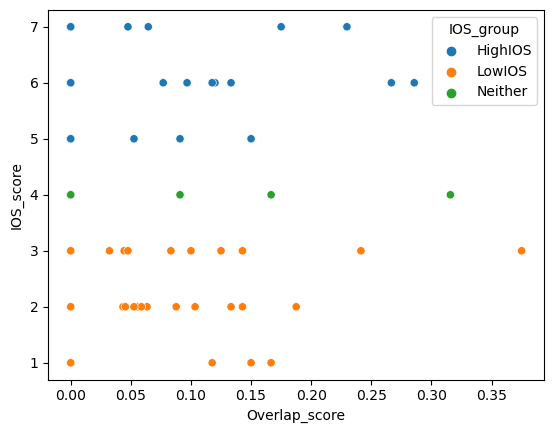

In [11]:
sns.scatterplot(x='Overlap_score', y='IOS_score', hue='IOS_group', data=df)

# Check the Outliers

In [12]:
df.loc[df['Overlap_score'] == 1, :]

,wc_self,wc_target,wc_intercept,Overlap_score,IOS_score,IOS_group
MID,,,,,,


# Confirmatory Analyses

## 01: a one-tailed independent two-sample t-test
The author had planned:
- sample size: 51 for each group
- alpha: 0.05
- effect size: 0.5
- power: 0.8

In [13]:
groupH = df[df['IOS_group']=='HighIOS']
groupL = df[df['IOS_group']=='LowIOS']

In [14]:
stats.ttest_ind(groupH['Overlap_score'], groupL['Overlap_score'], equal_var=False, alternative='greater') # perform Welch's t-test without assuming equal population variance.

TtestResult(statistic=-0.9994877368010185, pvalue=0.8395892203131051, df=73.86470331295281)

### Post hoc Power Analysis

In [15]:
print('Num. of group H: ' + str(len(groupH)))
print('Num. of group L: ' + str(len(groupL)))

Num. of group H: 37
Num. of group L: 39


Achived Power: 0.70

## 02: Spearman's rank correlation coefficient between the IOS scores and the overlapping scores
The author had planned:
- sample size: 119, including participants who rated on the IOS scale as 4
- alpha: 0.05
- effect size: 0.3
- power: 0.93
- two-tailed


In [16]:
iosscores = df['IOS_score']
overlapscores = df['Overlap_score']

In [17]:
res = stats.spearmanr(iosscores, overlapscores)
res

SignificanceResult(statistic=-0.1417201484494483, pvalue=0.19846899862007422)

### Post hoc Power Analysis

In [18]:
print('Num. of Sumple of the IOS socre: ' + str(len(iosscores)))
print('Num. of Sumple of the Overlapping socre: ' + str(len(overlapscores)))

Num. of Sumple of the IOS socre: 84
Num. of Sumple of the Overlapping socre: 84


Achieved power: 0.85